# **User Engagement Analysis**

In [ ]:
data = pd.read_csv("/content/drive/My Drive/showwcase_sessions.csv")

In [ ]:
data.head(5) 

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,day,week,active,daily,session_points,inactive_points
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,2,44,418.0,30,3,3
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,2,44,1633.0,30,3,2
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,2,44,659.0,30,4,4
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,2,44,633.0,30,2,1
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,2,44,274.0,30,3,3


**Dropping the null values as there are only 3 rows with null values**

In [ ]:
data.dropna(inplace=True)
data.reset_index(drop=True,inplace=True)

In [ ]:
#Converting the login date to date format

data['login_date'] = pd.to_datetime(data['login_date'])

**Creating a new Day variable to find trends according to days of week**

In [ ]:
data['day'] = data['login_date'].dt.weekday

In [ ]:
#Creating a function to plot the graphs
def plot_trends(columns):
    days = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    
    for columns in columns:
        plt.figure(figsize=(6,6))
        plt.plot(days,data.groupby('day')[columns].sum(),color='black',marker="o")
        plt.xlabel("Days")
        plt.ylabel(columns)
        plt.show()
    


**Creating Trends with respect to days**

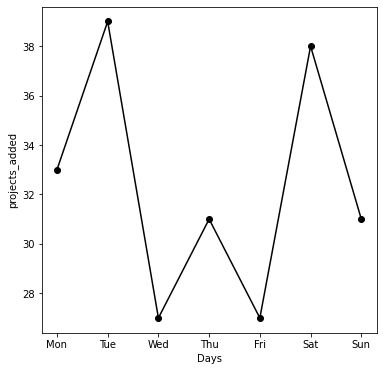

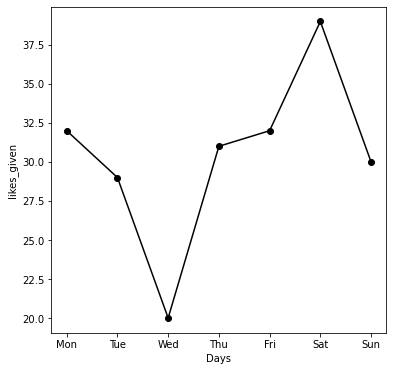

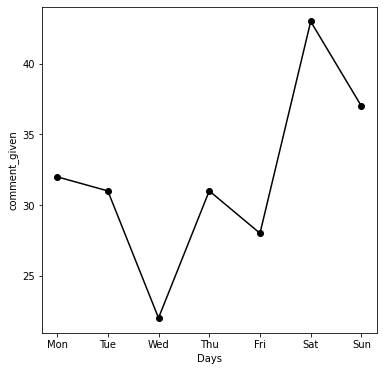

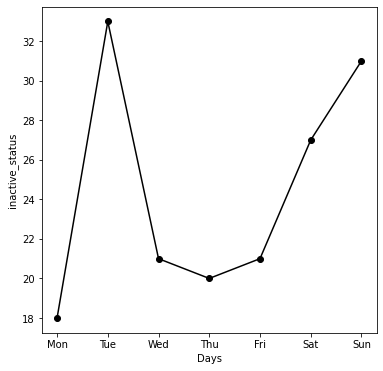

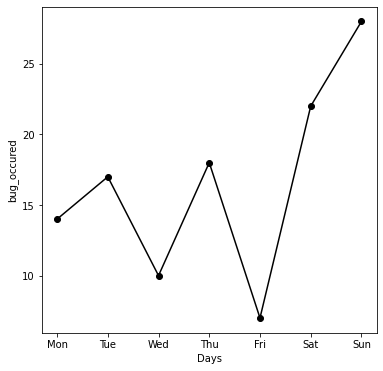

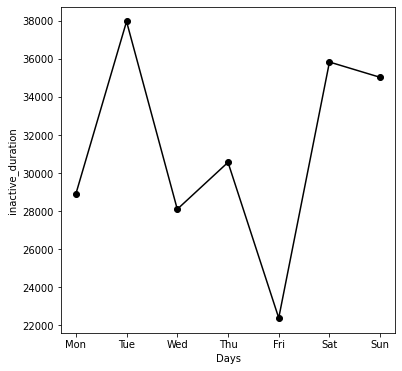

In [ ]:
plot_trends(['projects_added','likes_given','comment_given','inactive_status','bug_occured','inactive_duration'])

**From the Trends we can see that the projects added, likes given and comments do not follow a linear relationship and increases more towards the weekends**

**Hence we should give offers or provide new features to customers during the weekends as the probability of conversion during that time is more**

# **We can clearly conclude that as the number of session in a day increased the bugs in the system as well as the inactive time increased**


### **But on Mondays we can see more inactive time that means the users normally open up the website and simultaneously do other work as well.**

Let Us analyze the trends according to the week

In [ ]:
data['week']= data['login_date'].dt.week

In [ ]:
trend = data.groupby(['week'])['projects_added','likes_given','comment_given'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


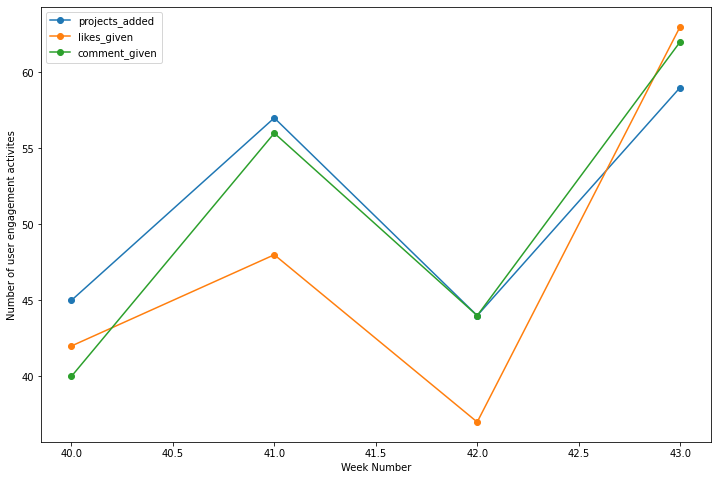

In [ ]:
plt.figure(figsize=(12,8))
plt.plot([40,41,42,43],trend[0:4],marker='o')
plt.xlabel('Week Number')
plt.ylabel("Number of user engagement activites")
plt.legend(trend.columns)

**We can see that as the month proceeds towards the end, the engagement also
increases, but you can see that in week 44 engagement is less because there were only 4 days in that particular week**

In [ ]:
session_trend = data.groupby('week')['session_id'].count().reset_index(name="week_session")
session_trend

,week,week_session
0,40,59
1,41,78
2,42,60
3,43,76
4,44,26


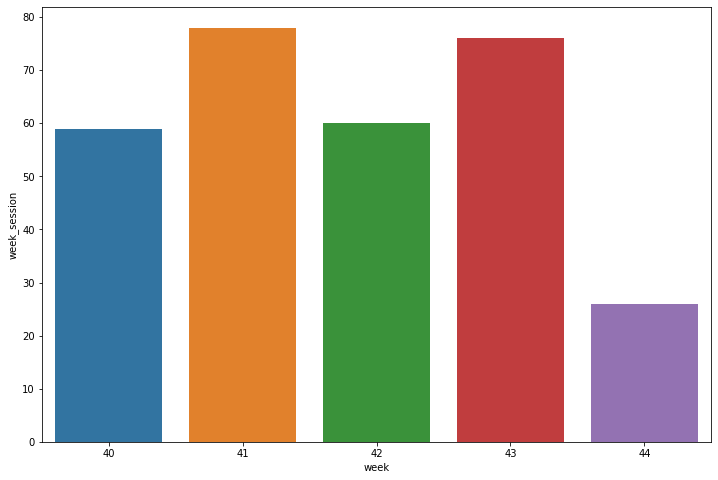

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x="week",y="week_session",data=session_trend)

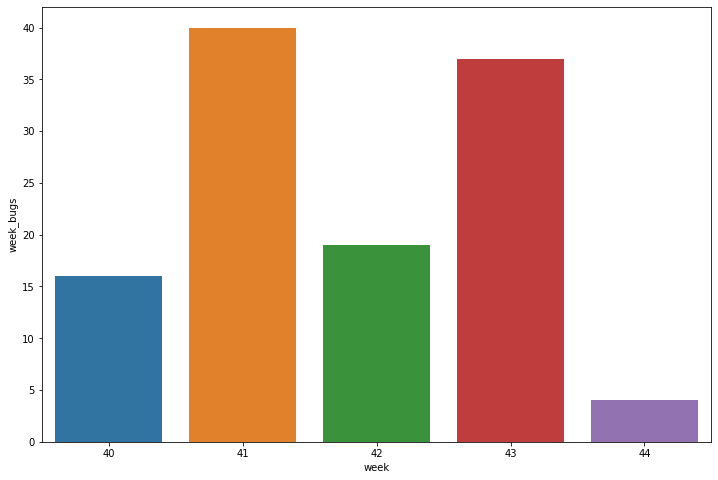

In [ ]:
bugs_trend = data.groupby('week')['bug_occured'].sum().reset_index(name='week_bugs')
plt.figure(figsize=(12,8))
sns.barplot(x="week",y="week_bugs",data=bugs_trend)

# **Hence we can conclude that as the session increases people are more engaged with adding projects, giving likes, comments and hence there are possibility of bug occuring as seen from graph above**

In [ ]:
trends = data.groupby(['week'])['session_projects_added','session_likes_given','session_comments_given'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


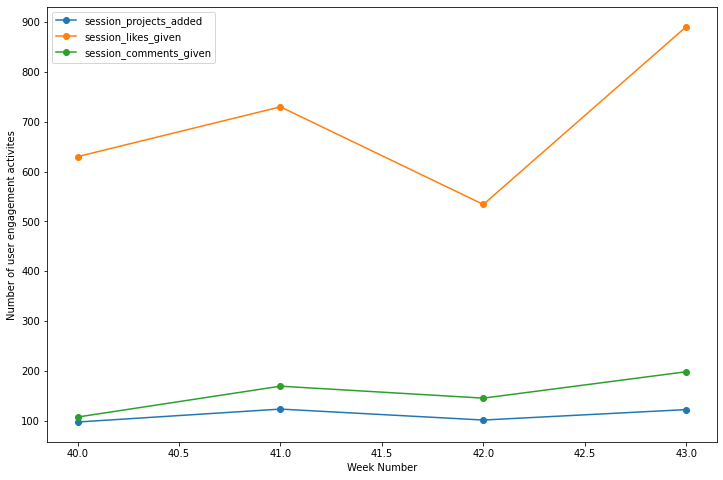

In [ ]:
plt.figure(figsize=(12,8))
plt.plot([40,41,42,43],trends[0:4],marker='o')
plt.xlabel('Week Number')
plt.ylabel("Number of user engagement activites")
plt.legend(trends.columns)

### **People are more likely to give a like as compared to commenting and adding projects**

In [ ]:
data['daily'] = data['login_date'].dt.day

In [ ]:
trend_daily = data.groupby(['daily'])['session_projects_added','session_likes_given','session_comments_given'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


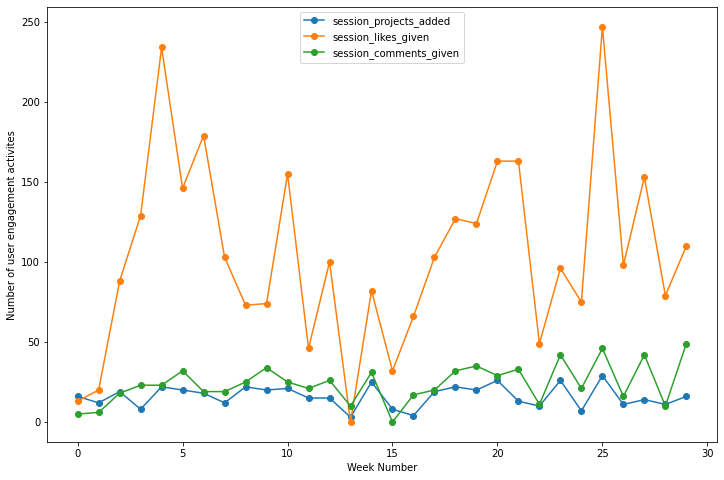

In [ ]:
plt.figure(figsize=(12,8))
plt.plot([*range(0,30)],trend_daily[0:30],marker='o')
plt.xlabel('Week Number')
plt.ylabel("Number of user engagement activites")
plt.legend(trend_daily.columns)


## **All user engagements have increased during the end of the month and were more during the start whereas decreased during the mid month.**


1.   The number of projects and comments added were moreover constant
2.   The engagement through likes kept on changing 
3.   Engagement through projects and comments are less as compared to likes given





## **Inactive Duration**

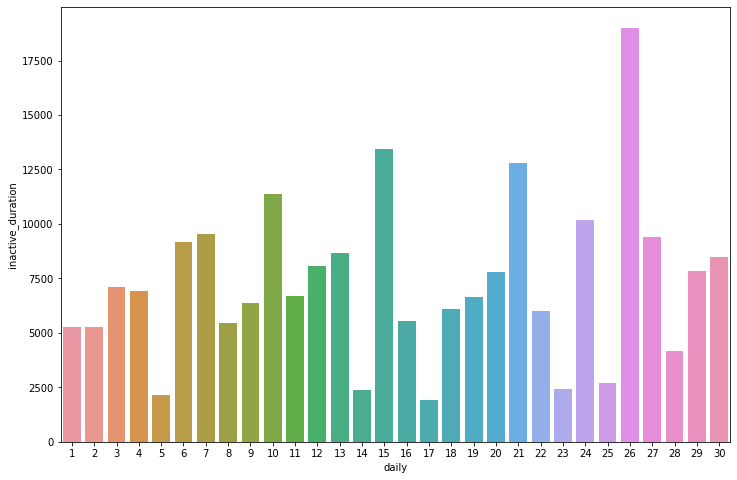

In [ ]:
plt.figure(figsize=(12,8))
inac = data.groupby('daily')['inactive_duration'].sum().reset_index()
sns.barplot(x="daily",y="inactive_duration",data=inac)


## **Session Duration**

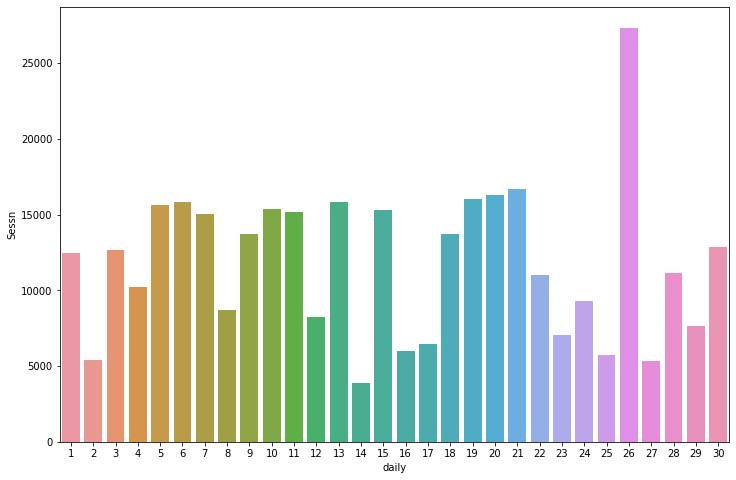

In [ ]:
plt.figure(figsize=(12,8))
sessn = data.groupby('daily')['session_duration'].sum().reset_index(name="Sessn")
sns.barplot(x="daily",y="Sessn",data=sessn)

## **Bug**

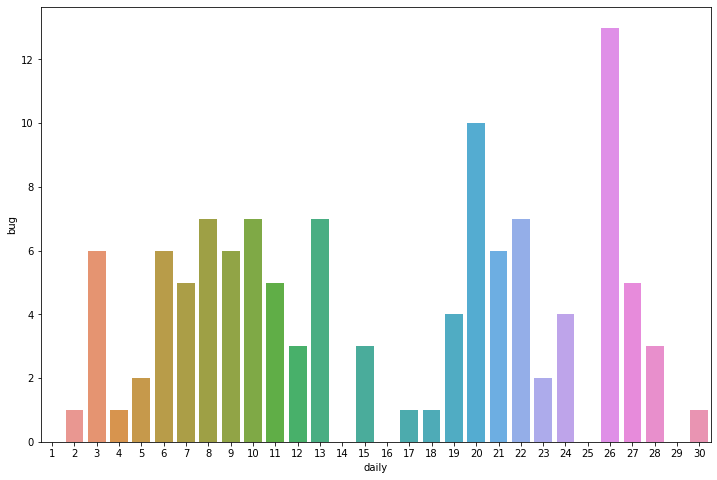

In [ ]:
buggg =  data.groupby('daily')['bug_occured'].sum().reset_index(name="bug")
plt.figure(figsize=(12,8))
sns.barplot(x="daily",y="bug",data=buggg)

### **As the number of session increases frequency of bugs is high leading to an increased inactive/idle time of users**




# **Point based system for Engagement**

In [ ]:
session_likes_points = (data.groupby(['customer_id'])['session_likes_given'].sum()/data.groupby(['customer_id'])['session_id'].count()).reset_index(name="like")
session_projects_points = (data.groupby(['customer_id'])['session_projects_added'].sum()/data.groupby(['customer_id'])['session_id'].count()).reset_index(name="projects")
session_comments_points = (data.groupby(['customer_id'])['session_comments_given'].sum()/data.groupby(['customer_id'])['session_id'].count()).reset_index(name="comments")
session_bugs_points = (data.groupby(['customer_id'])['bugs_in_session'].sum()/data.groupby(['customer_id'])['session_id'].count()).reset_index(name="bugs")

In [ ]:
hue = pd.DataFrame(data['session_duration'].describe())
hue

,session_duration
count,299.000000
mean,1190.414716
std,686.871418
min,10.000000
25%,614.000000
50%,1152.000000
75%,1778.000000
max,2395.000000


## **Classifying the Session duration according to the percentile wherein**

1.   duration < 25% = 1
2.   duration > 25% and duration < 50% = 2
3.   duration > 50% and duration < 75% = 3
4.   duration > 75% = 4



In [ ]:
data['session_points']=0

for i in range(0,data.shape[0]):

    if data['session_duration'][i] <= hue['session_duration']['25%'] :
        data['session_points'][i] = 1
    elif ((data['session_duration'][i] > hue['session_duration']['25%']) & (data['session_duration'][i] <= hue['session_duration']['50%'])):
        data['session_points'][i] = 2
    elif ((data['session_duration'][i] > hue['session_duration']['50%']) & (data['session_duration'][i] <= hue['session_duration']['75%'])):
        data['session_points'][i] = 3
    elif data['session_duration'][i] > hue['session_duration']['75%']:
        data['session_points'][i] = 4




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-pa

In [ ]:
inacti = pd.DataFrame(data['inactive_duration'].describe())
inacti

,inactive_duration
count,299.000000
mean,731.638796
std,839.247660
min,0.000000
25%,0.000000
50%,312.000000
75%,1525.500000
max,2480.000000


## **Classifying the Session duration according to the percentile wherein**

1.   inactivity < 25% = 1
2.   inactivity > 25% and inactivity < 50% = 2
3.   inactivity > 50% and inactivity < 75% = 3
4.   inactivity > 75% = 4


In [ ]:
data['inactive_points']=0

for i in range(0,data.shape[0]):

    if data['inactive_duration'][i] <= inacti['inactive_duration']['25%'] :
        data['inactive_points'][i] = 1
    elif ((data['inactive_duration'][i] > inacti['inactive_duration']['25%']) & (data['inactive_duration'][i] <= inacti['inactive_duration']['50%'])):
        data['inactive_points'][i] = 2
    elif ((data['inactive_duration'][i] > inacti['inactive_duration']['50%']) & (data['inactive_duration'][i] <= inacti['inactive_duration']['75%'])):
        data['inactive_points'][i] = 3
    elif data['inactive_duration'][i] > inacti['inactive_duration']['75%']:
        data['inactive_points'][i] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-pa

In [ ]:
inactive_points = (data.groupby(['customer_id'])['inactive_points'].mean()).reset_index(name="inactive")

In [ ]:
session_points = (data.groupby(['customer_id'])['session_points'].mean()).reset_index(name="session")

In [ ]:
final = pd.DataFrame({'Customers' : session_likes_points.customer_id,
 'Projects'      : session_projects_points.projects,
 'Likes'         : session_likes_points.like  ,
 'Comments'      : session_comments_points.comments,
 'bugs'          : session_bugs_points.bugs,
 'session_pts'   : session_points.session,
 'inactive_pts'  : inactive_points.inactive})

In [ ]:
final

,Customers,Projects,Likes,Comments,bugs,session_pts,inactive_pts
0,10246.0,2.000000,13.250000,0.750000,2.250000,1.750000,2.250000
1,12407.0,2.125000,10.250000,3.000000,0.750000,2.875000,2.500000
2,12496.0,1.500000,8.833333,3.833333,0.666667,2.166667,2.333333
3,12940.0,0.400000,17.800000,3.000000,0.600000,2.800000,2.800000
4,14354.0,2.066667,10.000000,2.533333,1.000000,2.466667,2.066667
5,19348.0,1.000000,22.000000,1.000000,0.000000,3.000000,4.000000
6,19374.0,1.000000,0.000000,4.000000,0.000000,3.000000,1.000000
7,20548.0,3.000000,25.000000,0.000000,1.000000,1.000000,4.000000
8,23083.0,1.090909,10.181818,1.272727,1.454545,2.272727,2.909091
9,23404.0,1.150000,10.350000,3.100000,1.650000,2.550000,2.150000


# **User Engagement Analysis**

## **Adding the points from Projects, Likes, Comments, Bugs, Session and Inactive Duration**

In [ ]:
final['score'] = final.Projects + final.Likes + final.Comments + final.bugs + final.session_pts - final.inactive_pts

In [ ]:
percent_25 = final['score'].describe()[4]

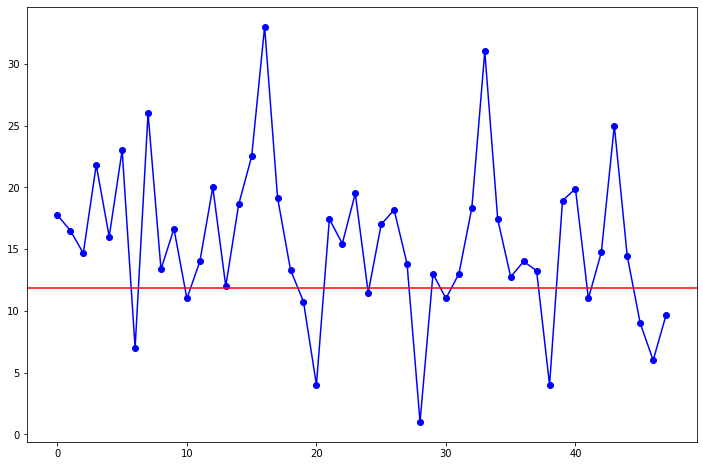

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(0,len(final)),final.score,color='blue',marker = 'o')
plt.axhline(y=percent_25,color='red')

## **Each customers score can be seen above. I have considered the 25 percentile for minimum score. Customers with more than 25 percentile can be considered as those with more engagement as well**

## **Recommendation : User engagement can be increased by decreasing the number of bugs and making the UI smooth for users.**